## **Start**

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D 
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd

**Preprocessing**

In [ ]:
data= pd.read_excel('preprocess_done.xlsx')
data = data[['clean', 'label']]
Y = data['label']

In [ ]:
!pip install -q Sastrawi

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
  return text.lower()

def remove_punctuation(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('user',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('  +', ' ', text) # Remove extra spaces
  text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Remove nonalphanumeric
  text = re.sub(r"\d+", "", text) # Remove number
  return text

def remove_whitespace_LT(text):
  return text.strip() # Remove leading and trailing space

def remove_whitespace_multiple(text):
  text = text.strip()
  return re.sub('\s+',' ',text)

def remove_single_char(text):
  return re.sub(r'\b(?:\w{,1})\b', '', text)

def remove_stopword(text):
  with open('tala_stopwords.txt', 'r') as sw:
    stopwords = sw.readlines()
  list_stopwords = [word.strip() for word in stopwords]

  text = ' '.join(['' if word in list_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text) # Remove extra spaces
  text = text.strip()
  return text

def stemming(text):
  return stemmer.stem(text)

In [ ]:
def preprocess(text):
  text = lowercase(text)
  text = remove_punctuation(text)
  text = remove_whitespace_LT(text)
  text = remove_whitespace_multiple(text)
  text = remove_single_char(text)
  text = remove_stopword(text)
  text = stemming(text)
  return text

In [ ]:
data.head()

,clean,label
0,rintang besar tangan islamofobia beda definisi...,1
1,austria siap undang undang diskriminasi muslim...,1
2,islamofobia eropa duga subur golong elite,1
3,negeri wkwkland dapat pakar dengar pakar tuhan...,1
4,islam alami marginalisasi gejala islamofobia l...,1


**Inisialisasi** **data**

In [ ]:
max_fatures = 7000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['clean'].values)
X = tokenizer.texts_to_sequences(data['clean'].values)
X = pad_sequences(X)

In [ ]:
print (X)

[[   0    0    0 ...  135  754  528]
 [   0    0    0 ... 2309 2310 2311]
 [   0    0    0 ...  378  284 2312]
 ...
 [   0    0    0 ...  875 2184    1]
 [   0    0    0 ...    0  208    1]
 [   0    0    0 ... 5745  291 2302]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 1/10, random_state = 42)

In [ ]:
print(X_train[0])
print(y_train[0])


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1  437
 1181  391    2 1182   18  174  207  224  487    2  153]
1


In [ ]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)

Shape of training data: 
(1416, 53)
(1416,)


In [ ]:
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of test data: 
(158, 53)
(158,)


In [ ]:
print(X_test[0])
print(y_test)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 580 181  83 201 750 411 750 230   1]
1121    1
811     1
1172    0
534     0
514     1
       ..
755     1
615     1
917     0
916     0
1057    0
Name: label, Length: 158, dtype: int64


## **Model CNN**

In [ ]:
model = Sequential()
model.add(Embedding(7000, 1,input_length = X.shape[1]))

model.compile('rmsprop', 'mse')

output_array = model.predict(X_test)

In [ ]:
print(X_test[1])
print(output_array[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  589  606  606
  391  798    5    5  114  793 1396 1995  284  109    1]
[[ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [ 0.0257397 ]
 [-0.04311794]
 [ 0.03480389]
 [ 0.03480389]
 [ 0.04307621]
 [ 0.00455891]
 [-0.02715609]
 [-0.02715609]
 [-0.03730882]
 [-0.01112807]
 [-0.03341

In [ ]:
top_words = 7000
model = Sequential()
model.add(Embedding(top_words, 300, input_length=X.shape[1]))
model.add(Conv1D(16, 10, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=1))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 53, 300)           2100000   
_________________________________________________________________
conv1d (Conv1D)              (None, 53, 16)            19216     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 52, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 832)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               208250    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 2,327,717
Trainable params: 2,327,717
Non-trainable params: 0
______________________________________________

In [ ]:
m = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1)

Epoch 1/100
45/45 [==============================] - 19s 60ms/step - loss: 0.6821 - accuracy: 0.5810 - val_loss: 0.6496 - val_accuracy: 0.5570
Epoch 2/100
45/45 [==============================] - 2s 47ms/step - loss: 0.4415 - accuracy: 0.7623 - val_loss: 0.5560 - val_accuracy: 0.7532
Epoch 3/100
45/45 [==============================] - 2s 45ms/step - loss: 0.1292 - accuracy: 0.9580 - val_loss: 0.5879 - val_accuracy: 0.7595
Epoch 4/100
45/45 [==============================] - 2s 46ms/step - loss: 0.0301 - accuracy: 0.9916 - val_loss: 0.6429 - val_accuracy: 0.7405
Epoch 5/100
45/45 [==============================] - 2s 47ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.6189 - val_accuracy: 0.7405
Epoch 6/100
45/45 [==============================] - 2s 46ms/step - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.6876 - val_accuracy: 0.7468
Epoch 7/100
45/45 [==============================] - 2s 45ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7448 - val_accuracy: 0.7342
Epoch

In [ ]:
m.history

{'accuracy': [0.5967513918876648,
  0.8156779408454895,
  0.9569209218025208,
  0.9894067645072937,
  0.9922316670417786,
  0.9971751570701599,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6695661544799805,
  0.3991641402244568,
  0.11705835163593292,
  0.0388309583067894,
  0.023851625621318817,
  0.012431042268872261,
  0.003715930273756385,
  0.0013482668437063694,
  0

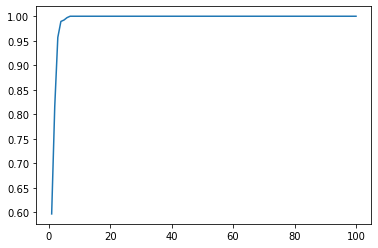

In [ ]:
import matplotlib.pyplot as plt
acc = m.history['accuracy']
loss = m.history['loss']
x = range(1, len(acc) + 1)
plt.plot(x, acc)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 7ms/step - loss: 1.3702 - accuracy: 0.7342


In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.42%


In [ ]:
Y_pred = model.predict_classes(X_test)
print("confusion matrix")
con = confusion_matrix(y_test, Y_pred)
print(con)
print(classification_report(y_test, Y_pred))
print("accuracy ", accuracy_score(y_test, Y_pred)*100)
print("precision ", precision_score(y_test, Y_pred))
print("Recall ",recall_score(y_test, Y_pred))
print("F1 score ",f1_score(y_test, Y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix
[[46 24]
 [18 70]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        70
           1       0.74      0.80      0.77        88

    accuracy                           0.73       158
   macro avg       0.73      0.73      0.73       158
weighted avg       0.73      0.73      0.73       158

accuracy  73.41772151898735
precision  0.7446808510638298
Recall  0.7954545454545454
F1 score  0.7692307692307692


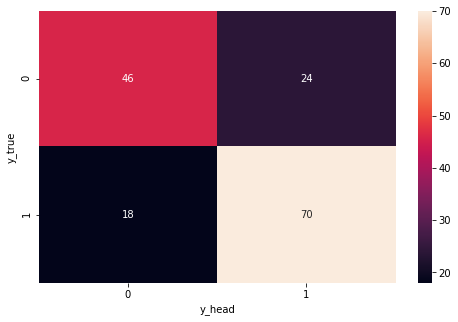

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

## **Hyperparameter Tuning**

In [ ]:
#Parameter
nn = [16, 32, 64, 128]
filter_size = [4, 7, 10, 12]
pool_size = [2, 3, 4, 5]

out_nn = []
out_fz = []
out_ps = []
out_acc = []
pre = []
re = []
f1 = []

#Model_CNN
for i in nn:
  for j in filter_size:
    for k in pool_size:
       model = Sequential()
       model.add(Embedding(7000, 300, input_length=X.shape[1]))
       model.add(Conv1D(i, j, padding='same', activation='relu'))
       model.add(MaxPooling1D(pool_size=k, strides=1))
       model.add(Flatten())
       model.add(Dense(250, activation='relu'))
       model.add(Dense(1, activation='sigmoid'))

       model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
       model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=2)
       y_pred = model.predict_classes(X_test)
       score = model.evaluate(X_test, y_test, verbose=1)
        

       pre.append(precision_score(y_test, y_pred))
       re.append(recall_score(y_test, y_pred))
       f1.append(f1_score(y_test, y_pred))
       out_nn.append(i)
       out_fz.append(j)
       out_ps.append(k)
       out_acc.append(score[1] )

Epoch 1/150
45/45 - 3s - loss: 0.6733 - accuracy: 0.5968 - val_loss: 0.6511 - val_accuracy: 0.5570
Epoch 2/150
45/45 - 2s - loss: 0.4134 - accuracy: 0.8164 - val_loss: 0.5939 - val_accuracy: 0.7089
Epoch 3/150
45/45 - 2s - loss: 0.1134 - accuracy: 0.9718 - val_loss: 0.7406 - val_accuracy: 0.7152
Epoch 4/150
45/45 - 2s - loss: 0.0358 - accuracy: 0.9929 - val_loss: 1.1562 - val_accuracy: 0.6582
Epoch 5/150
45/45 - 2s - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.7486 - val_accuracy: 0.7215
Epoch 6/150
45/45 - 2s - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.8759 - val_accuracy: 0.7089
Epoch 7/150
45/45 - 2s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8832 - val_accuracy: 0.7215
Epoch 8/150
45/45 - 2s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9485 - val_accuracy: 0.6962
Epoch 9/150
45/45 - 2s - loss: 8.7647e-04 - accuracy: 1.0000 - val_loss: 0.9609 - val_accuracy: 0.7089
Epoch 10/150
45/45 - 2s - loss: 6.0136e-04 - accuracy: 1.0000 - val_loss: 0.9652 - val_accuracy: 0.7278
E

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Output streaming akan dipotong hingga 5000 baris terakhir.
Epoch 124/150
45/45 - 3s - loss: 3.6399e-07 - accuracy: 1.0000 - val_loss: 1.6214 - val_accuracy: 0.7468
Epoch 125/150
45/45 - 3s - loss: 3.5370e-07 - accuracy: 1.0000 - val_loss: 1.6240 - val_accuracy: 0.7468
Epoch 126/150
45/45 - 3s - loss: 3.4377e-07 - accuracy: 1.0000 - val_loss: 1.6272 - val_accuracy: 0.7468
Epoch 127/150
45/45 - 3s - loss: 3.3436e-07 - accuracy: 1.0000 - val_loss: 1.6303 - val_accuracy: 0.7468
Epoch 128/150
45/45 - 3s - loss: 3.2427e-07 - accuracy: 1.0000 - val_loss: 1.6326 - val_accuracy: 0.7468
Epoch 129/150
45/45 - 3s - loss: 3.1508e-07 - accuracy: 1.0000 - val_loss: 1.6366 - val_accuracy: 0.7468
Epoch 130/150
45/45 - 3s - loss: 3.0589e-07 - accuracy: 1.0000 - val_loss: 1.6385 - val_accuracy: 0.7468
Epoch 131/150
45/45 - 3s - loss: 2.9735e-07 - accuracy: 1.0000 - val_loss: 1.6419 - val_accuracy: 0.7468
Epoch 132/150
45/45 - 3s - loss: 2.8905e-07 - accuracy: 1.0000 - val_loss: 1.6457 - val_accuracy: 0.7

In [ ]:
data1 = pd.read_excel('output.xlsx')

data1['filter'] = out_nn
data1['layerconv'] = out_fz
data1['pool size'] = out_ps
data1['acc'] = out_acc
data1['precision'] = pre
data1['recall'] = re
data1['f1'] = f1

data1.to_excel('output.xlsx')